### **This Notebook explores the relationship between player age and average days missed due to injuries in soccer players.**

#### Imports

In [18]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy.stats import zscore

#### Connection => Query => DataFrame

In [35]:
db_path = "soccer_injuries.db"
conn = sqlite3.connect(db_path)

query = """
SELECT age,
       ROUND(AVG(Days), 2) AS avg_days_missed
FROM soccer_injuries
GROUP BY age
"""
df = pd.read_sql(query, conn)

df["age"] = pd.to_numeric(df["age"], errors="coerce")
df["avg_days_missed"] = pd.to_numeric(df["avg_days_missed"], errors="coerce")
df = df[(np.abs(zscore(df["avg_days_missed"])) < 0.7)]
print(df.dtypes)
print(df.head())
print(df["age"].nunique(), "unique ages")

age                float64
avg_days_missed    float64
dtype: object
    age  avg_days_missed
1  17.0            33.24
2  18.0            39.94
3  19.0            45.77
4  20.0            43.09
5  21.0            35.72
23 unique ages


#### Regression

In [36]:
slope, intercept, r_value, p_value, std_err = linregress(df["age"], df["avg_days_missed"])
line = slope * df["age"] + intercept

print(f"Correlation (r): {r_value:.3f}, p-value: {p_value:.3g}")

Correlation (r): -0.477, p-value: 0.0214


#### Visualization (Plotting Dataframe)

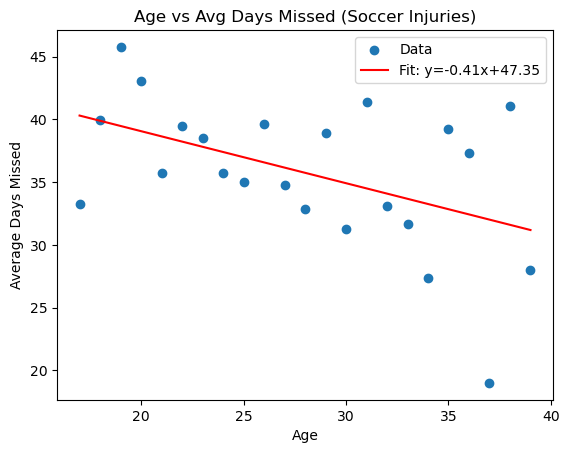

In [37]:
plt.scatter(df["age"], df["avg_days_missed"], label="Data")
plt.plot(df["age"], line, color="red", label=f"Fit: y={slope:.2f}x+{intercept:.2f}")
plt.xlabel("Age")
plt.ylabel("Average Days Missed")
plt.title("Age vs Avg Days Missed (Soccer Injuries)")
plt.legend()
plt.show()

#### Conclusion: Despite hypothesis that older players would have more days missed, data shows there is low **negative** correlation (r=-0.477) between age and average days missed due to injuries in soccer players.